# Data Analytics Fall 2025 &mdash; Exercises 5

### XXXXX XXXXX (last modified: Tue 4 Nov)

- Five problems + round 4 peer review
- Theme: linear regression
- Keep your originals up to date by running the code cell below:

In [3]:
import os
os.system('/usr/bin/bash /home/varpha/dan/config.sh');


Configuring...

  created the ~/dan directory tree
  changed all ~/dan subdir permissions to 700
  removed any broken filelinks under ~/dan
  copied filelinks from /home/varpha/dan to ~/dan
  removed any python cache dirs
  creating answers workbook (Darren's idea)
  copied /home/varpha/dan/private/XXXXX/exrc_06/exrc_06.ipynb to /home/XXXXX/dan/private/exrc_06/exrc_06_answers.ipynb

  upgrading jupyterlab etc. (may take a while)...


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  done (you may need to restart your server in order for the upgrades to take effect)

All Done!

Please run this config script whenever you start working on the hub.

If you encountered errors, please re-run the script. If the errors persist, please report to our Teams channel.

Also, please do 'File -> Hub Control Panel -> Stop My Server'
whenever you stop working on the hub.

Thank you!



## Round 4 peer review

As usual.


## Problem 1. Basic

a) Write a function *least_square_fit* that takes two one-dimensional arrays x and y as parameters. The function should return a tuple (slope, intercept) of the fitted line. Write a main program that tests the *least_square_fit* function with some example arrays, and for each pair of arrays outputs the (slope, intercept) tuple.

b) Modify your main function to plot a scatter plot of the data points along with the fitted line. Also display the values of the slope and intercept from part a) in the figure.

In [62]:
import numpy as np

def least_square_fit(x, y):
    
    x = np.array(x)
    y = np.array(y)

    # Count the slope and intercept
    slope = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean()) ** 2)
    intercept = y.mean() - slope * x.mean()

    return slope, intercept


def main():
    # test numbers
    examples = [
        ( [1, 2, 3, 4], [2, 4, 6, 8] ),
        ( [0, 1, 2, 3], [1, 2, 2, 4] ),
        ( [10, 20, 30], [5, 15, 25] )
    ]

    for x, y in examples:
        slope, intercept = least_square_fit(x, y)
        print(f"x = {x}, y = {y}")
        print(f"  -> (slope, intercept) = ({slope:.3f}, {intercept:.3f})\n")


if __name__ == "__main__":
    main()


x = [1, 2, 3, 4], y = [2, 4, 6, 8]
  -> (slope, intercept) = (2.000, 0.000)

x = [0, 1, 2, 3], y = [1, 2, 2, 4]
  -> (slope, intercept) = (0.900, 0.900)

x = [10, 20, 30], y = [5, 15, 25]
  -> (slope, intercept) = (1.000, -5.000)



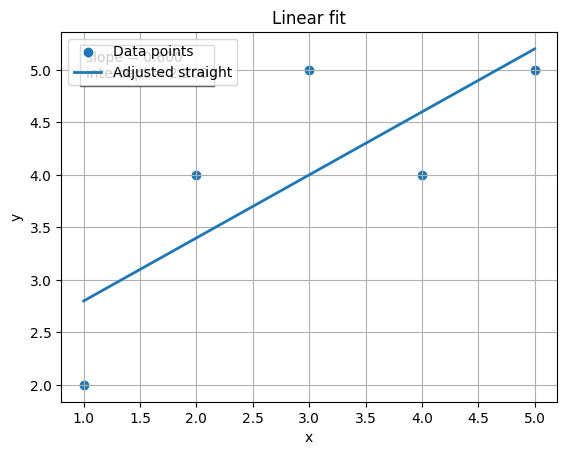

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def least_square_fit(x, y):
    x = np.array(x)
    y = np.array(y)

    # Count the slope and intercept
    slope = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean()) ** 2)
    intercept = y.mean() - slope * x.mean()

    return slope, intercept


def main():
    # Example data
    x = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 4, 5, 4, 5])

    # Calculate the adjustment
    slope, intercept = least_square_fit(x, y)

    # Line points for drawing
    x_line = np.linspace(min(x), max(x), 100)
    y_line = slope * x_line + intercept

    # Plot
    plt.scatter(x, y, label="Data points")
    plt.plot(x_line, y_line, label="Adjusted straight", linewidth=2)

    # Show the results in the picture
    text = f"slope = {slope:.3f}\nintercept = {intercept:.3f}"
    plt.text(0.05, 0.95, text, transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))

    plt.title("Linear fit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    plt.show()


if __name__ == "__main__":
    main()


## Problem 2. Unknown data

There is some unknown data in your `exrc_05/data/XXXXX_unknown_data.csv`. All you know is that the first five columns are the features and the last column is the response. Use scikit-learn's LinearRegression to fit a linear model to this data. Also implement a function `unknown_data` that reads the file, "learns", and returns the correlation coefficient for each of the five features against the response. You don't have to fit the intercept in linear regression, and you also don't have to split the data in your "training". The main method should just print out the coefficient for each of the five features, and use all the data for "training". Do you think that some of the features could be dropped from the model? Why?

*Hint / Clarification:* The problem is cooked up in such a way that the six columns are linearly dependent.

In [65]:
import pandas as pd

df = pd.read_csv('data/XXXXX_unknown_data.csv')

print(df.head())

          X1         X2         X3         X4         X5            Y
0  10.096519  83.169894  39.276787  30.825881  58.897953  2684.770141
1  56.497359  25.599839  95.438573  58.717165  72.257581  3555.605885
2  83.403906  28.295493  12.068294  74.015901  36.871698  2014.807855
3  42.159929  47.943605  86.279741  83.948903   7.474036  2298.901994
4  70.945847   2.672829   7.062580  63.214362  27.174486  1354.050946


In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def unknown_data(filename):
  
    # Read file
    data = pd.read_csv(filename)

    # First five columns are features, last is Y
    X = data.iloc[:, 0:5].values
    y = data.iloc[:, 5].values

    # Fit linear regression (without intercept)
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    # Correlation of each Xi with Y
    corrs = []
    for i in range(5):
        corr = np.corrcoef(X[:, i], y)[0, 1]
        corrs.append(corr)

    return model.coef_, corrs


def main():
  
    filename = 'data/XXXXX_unknown_data.csv'
    coeffs, corrs = unknown_data(filename)

    print("Linear regression coefficients:")
    for i, c in enumerate(coeffs, start=1):
        print(f"X{i}: {c:.6f}")

    print("\nCorrelation coefficients vs Y:")
    for i, r in enumerate(corrs, start=1):
        print(f"corr(X{i}, Y): {r:.6f}")

   # Do you think that some of the features could be dropped from the model? Why?
    print("\nYes, some features can be dropped.")
    print("Because the dataset is constructed so that the six columns are linearly dependent, at least one feature is redundant.")
    print("The redundant feature(s) do not add new information to the regression, and multicollinearity means the coefficients are not uniquely determined.")

if __name__ == "__main__":
    main()


Linear regression coefficients:
X1: 10.000000
X2: 11.000000
X3: 14.000000
X4: 0.000000
X5: 19.000000

Correlation coefficients vs Y:
corr(X1, Y): 0.351766
corr(X2, Y): 0.424630
corr(X3, Y): 0.463108
corr(X4, Y): -0.019641
corr(X5, Y): 0.650818

Yes, some features can be dropped.
Because the dataset is constructed so that the six columns are linearly dependent, at least one feature is redundant.
The redundant feature(s) do not add new information to the regression, and multicollinearity means the coefficients are not uniquely determined.


## Problem 3. Query

The file `exrc_05/data/XXXXX_query.txt` has some fake customer survey data.

a) Which of the other fields affects most on 'general satisfaction' and why? Use correlation coefficients.

b) Fit a linear model using only the field found in a), then plot two plots:
1. a scatter plot with general satisfaction against the field found in part a)
2. a scatter plot with the "actual" and "predicted" general satisfaction values.

Again, no splitting of data (use all the data for training).


In [67]:
import pandas as pd

df = pd.read_csv('data/XXXXX_query.txt')

print(df.head())

   delivery speed  price level  price flexibility  supplier image  service  \
0             4.1          0.6                6.9             4.7      2.4   
1             1.8          3.0                6.3             6.6      2.5   
2             3.4          5.2                5.7             6.0      4.3   
3             2.7          1.0                7.1             5.9      1.8   
4             6.0          0.9                9.6             7.8      3.4   

   sales staff image  product quality  general satisfaction  
0                2.3              5.2                   4.2  
1                4.0              8.4                   4.3  
2                2.7              8.2                   5.2  
3                2.3              7.8                   3.9  
4                4.6              4.5                   6.8  


Correlation with general satisfaction:
 delivery speed       0.650632
price level          0.028395
price flexibility    0.524814
supplier image       0.475934
service              0.631233
sales staff image    0.340909
product quality     -0.283340
Name: general satisfaction, dtype: float64

Field with strongest correlation: delivery speed


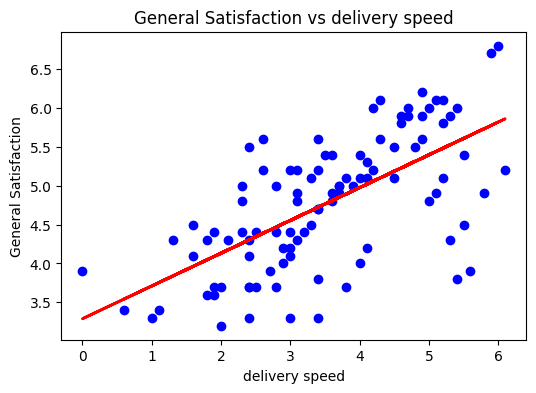

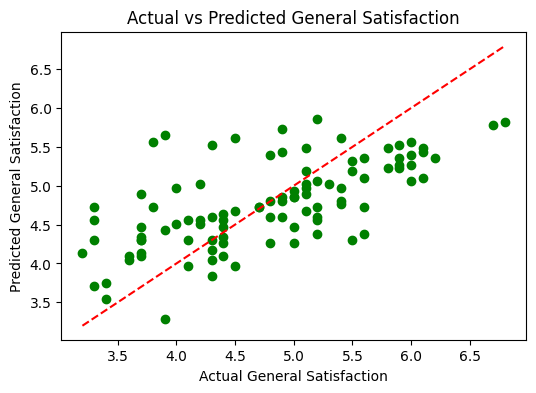

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the data from CSV
df = pd.read_csv('data/XXXXX_query.txt')

# Compute correlation coefficients with 'general satisfaction'
correlations = df.corr()['general satisfaction'].drop('general satisfaction')
print("Correlation with general satisfaction:\n", correlations)

# Find the field with the highest absolute correlation
best_field = correlations.abs().idxmax()
print("\nField with strongest correlation:", best_field)

# Fit linear regression using only the best field
X = df[[best_field]]
y = df['general satisfaction']

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot 1 - scatter of general satisfaction vs best field
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel(best_field)
plt.ylabel('General Satisfaction')
plt.title(f'General Satisfaction vs {best_field}')
plt.show()

# Plot 2 - scatter of actual vs predicted general satisfaction
plt.figure(figsize=(6,4))
plt.scatter(y, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual General Satisfaction')
plt.ylabel('Predicted General Satisfaction')
plt.title('Actual vs Predicted General Satisfaction')
plt.show()


## Problem 4. Housing, part 1

The file `exrc_05/data/XXXXX_houses.csv` has some fake data on sold houses.

The data is taken from [Kaggle](https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression) and randomized. The notebook is available in our `public/exrc_05/data` folder as well.

Prepare the data as in Section 1 of the Kaggle notebook: convert yes/no to 1/0, and add a dummy 1/0 variable to each of the furnishing status options.

Split the data to 60% train, 40% test, and and fit a linear model to the train data, predicting the test data. (No advanced stuff expected here; just the standard.)

Compare with a similar linear regression where only two explanatory variables is used. Plot real against predicted in both the above case (all the variables) and this case (two variables).

All variables - R² train: 0.6453, R² test: 0.6615
Two variables - R² train: 0.3704, R² test: 0.3466


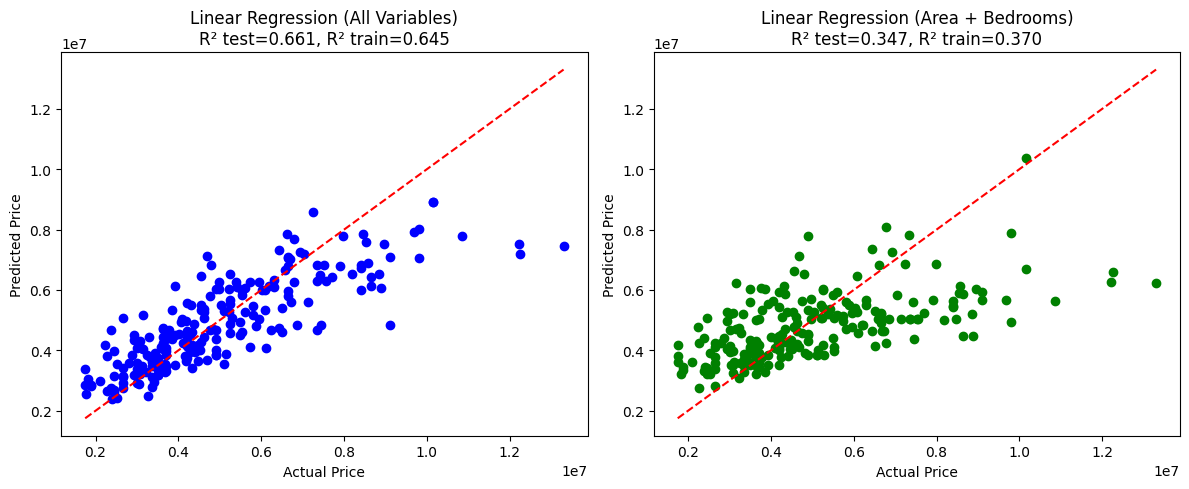

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Read the data
df = pd.read_csv('data/XXXXX_houses.csv')
df.fillna(0, inplace=True)

# Convert yes/no columns to 1/0 safely
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'parking', 'prefarea']

for col in yes_no_cols:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Convert 'furnishingstatus' to dummy variables
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Split data 60% train, 40% test
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit linear regression using all variables
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
y_train_pred_all = model_all.predict(X_train)

# Fit linear regression using only two explanatory variables (area + bedrooms)
X_train_two = X_train[['area', 'bedrooms']]
X_test_two = X_test[['area', 'bedrooms']]

model_two = LinearRegression()
model_two.fit(X_train_two, y_train)
y_pred_two = model_two.predict(X_test_two)
y_train_pred_two = model_two.predict(X_train_two)

# Compute R² scores for both train and test
r2_train_all = r2_score(y_train, y_train_pred_all)
r2_test_all = r2_score(y_test, y_pred_all)

r2_train_two = r2_score(y_train, y_train_pred_two)
r2_test_two = r2_score(y_test, y_pred_two)

print(f"All variables - R² train: {r2_train_all:.4f}, R² test: {r2_test_all:.4f}")
print(f"Two variables - R² train: {r2_train_two:.4f}, R² test: {r2_test_two:.4f}")

# Plot real vs predicted for both models
plt.figure(figsize=(12,5))

# All variables
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_all, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression (All Variables)\nR² test={r2_test_all:.3f}, R² train={r2_train_all:.3f}')

# Two variables
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_two, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression (Area + Bedrooms)\nR² test={r2_test_two:.3f}, R² train={r2_train_two:.3f}')

plt.tight_layout()
plt.show()


## Problem 5. Housing, part 2

Study the Kaggle notebook mentioned in the previous exercise. In your own style and examples, please explain what is meant by

- Overfitting
- RFE
- K-fold CV.


Overfitting means that a model learns the training data too well, including random noise or minor fluctuations. As a result, it performs very well on the training set but poorly on new, unseen data. In other words, it memorizes the training data instead of learning general patterns.

For example, suppose we build a model using all variables and the results are:
Train R² = 0.95 and Test R² = 0.40.

This would mean the model learned the training houses extremely well, but when predicting new houses (the test set), the accuracy is very low. This indicates that the model has overfitted: it learned details and noise from the training set that do not generalize to new data.

RFE (Recursive Feature Elimination) is a method that selects the most important features by repeatedly removing the least important ones until only the desired number of features remains.
example code in the next cell

Selected features by RFE:
Index(['bathrooms', 'mainroad', 'guestroom', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

R² train (RFE model): 0.5023
R² test  (RFE model): 0.5240


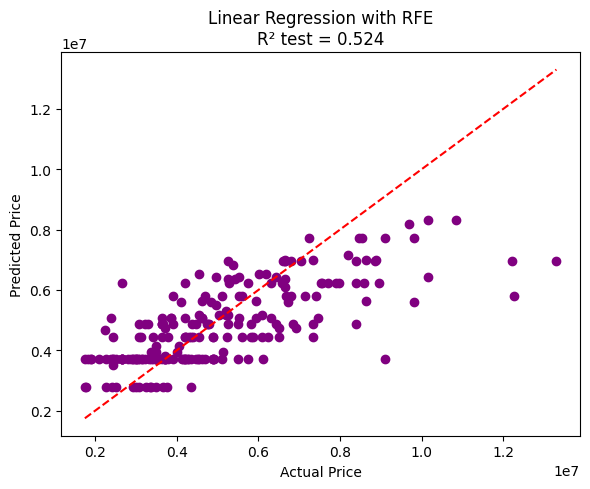

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Read the data
df = pd.read_csv('data/XXXXX_houses.csv')
df.fillna(0, inplace=True)

# Convert yes/no columns to 1/0 safely
yes_no_cols = ['mainroad', 'guestroom', 'basement', 
               'hotwaterheating', 'airconditioning', 
               'parking', 'prefarea']

for col in yes_no_cols:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Convert 'furnishingstatus' to dummy variables
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Split data 60% train, 40% test
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Apply RFE to select the best features

model = LinearRegression()

# Choose how many features you want RFE to keep
selector = RFE(model, n_features_to_select=6)

selector.fit(X_train, y_train)

# Selected feature names
selected_features = X_train.columns[selector.support_]
print("Selected features by RFE:")
print(selected_features)

# Reduce X_train and X_test to selected features only
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Fit model using RFE-selected features
model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)

y_pred_rfe = model_rfe.predict(X_test_rfe)

# Compute R² scores
r2_train_rfe = model_rfe.score(X_train_rfe, y_train)
r2_test_rfe = model_rfe.score(X_test_rfe, y_test)

print(f"\nR² train (RFE model): {r2_train_rfe:.4f}")
print(f"R² test  (RFE model): {r2_test_rfe:.4f}")

# Plot Actual vs Predicted for the RFE model
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_rfe, color='purple')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Linear Regression with RFE\nR² test = {r2_test_rfe:.3f}")
plt.tight_layout()
plt.show()


K-fold cross-validation (CV) is a method to evaluate a model’s performance more reliably. It works by splitting the data into K equal parts (folds). The model is trained on K−1 folds and tested on the remaining fold. This process is repeated K times, so each fold is used once as the test set. The results from all folds are then averaged to get a robust estimate of the model’s generalization performance.

example code in the exercise:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
print(scores)

Here, cv=5 means the training data is split into 5 folds.
The model is trained 5 times, each time using 4 folds for training and 1 fold for testing.
scores contains the 5 R² values from each fold, for example: [0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])